In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install geopandas contextily

In [3]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
import contextily as ctx

1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [4]:
comuni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Com01012022_g")
regioni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Reg01012022_g (1)")
province = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ProvCM01012022_g")

In [ ]:
comuni

In [ ]:
province

In [ ]:
regioni

In [5]:
regioni_mercatore = regioni.to_crs(3857)

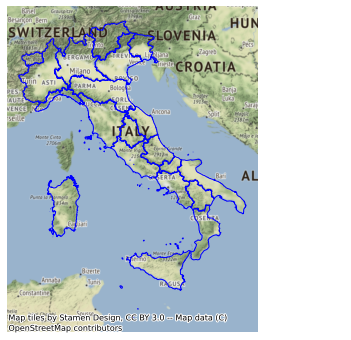

In [6]:
ax = regioni_mercatore.plot(figsize = (12, 6), edgecolor="blue", facecolor = "none")
ctx.add_basemap(ax)
ax.set_axis_off()

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa
(https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

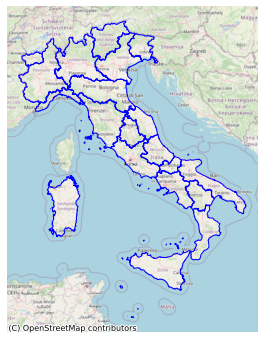

In [7]:
ax = regioni_mercatore.plot(figsize = (12, 6), edgecolor="blue", facecolor = "none")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

3. visualizzare le province della Lombardia su una mappa di contextily

In [8]:
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"].geometry.item()

In [9]:
province_lombardia = province[province.within(lombardia)]
province_lombardia = province_lombardia.to_crs(3857)

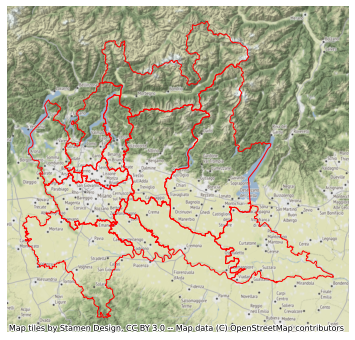

In [10]:
ax = province_lombardia.plot(figsize = (12, 6), edgecolor="red", facecolor = "none")
ctx.add_basemap(ax)
ax.set_axis_off()

4.  visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

In [11]:
provincia_milano = province[province["DEN_UTS"] == "Milano"].geometry.item()

In [12]:
comune_milano = comuni[comuni["COMUNE"] == "Milano"].geometry.item()

In [13]:
provincia_milanoGeo = gdp.GeoSeries([provincia_milano], crs=32632).to_crs(3857)

In [14]:
comune_milanoGeo = gdp.GeoSeries([comune_milano], crs=32632).to_crs(3857)

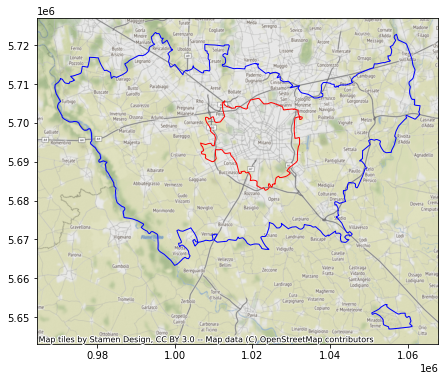

In [15]:
ax = provincia_milanoGeo.plot(figsize = (12, 6), edgecolor = "blue", facecolor = "none")
comune_milanoGeo.plot(ax = ax, edgecolor = "red", facecolor = "none")
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

In [16]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/LOTORTO RICCARDO - ds964_nil_wm.zip")

In [17]:
quartieri_mercatore = quartieri.to_crs(3857)

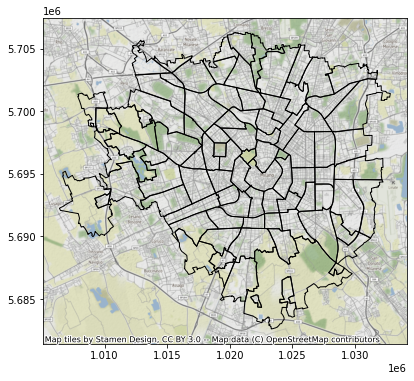

In [19]:
ax = quartieri_mercatore.plot(figsize = (12, 6), edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

In [34]:
provincia_inserita = input("inserire una provincia della lombardia ")
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"].geometry.item()
provincia = province[province["DEN_UTS"] == provincia_inserita].geometry.item()
if provincia.within(lombardia) == True:
  province_confinanti = province[province.touches(provincia)]
  ax = province_confinanti.plot(figsize = (12, 6))
  provinciaGeo = gdp.GeoSeries([provincia])
  provinciaGeo.plot(ax = ax, edgecolor="red", facecolor = "none")
  ax.set_axis_off()
else:
  print("provincia non in lombardia")

inserire una provincia della lombardia Napoli
provincia non in lombardia
